# 

Basis vectors:
 [[0. 4. 4.]
 [4. 0. 4.]
 [4. 4. 0.]]


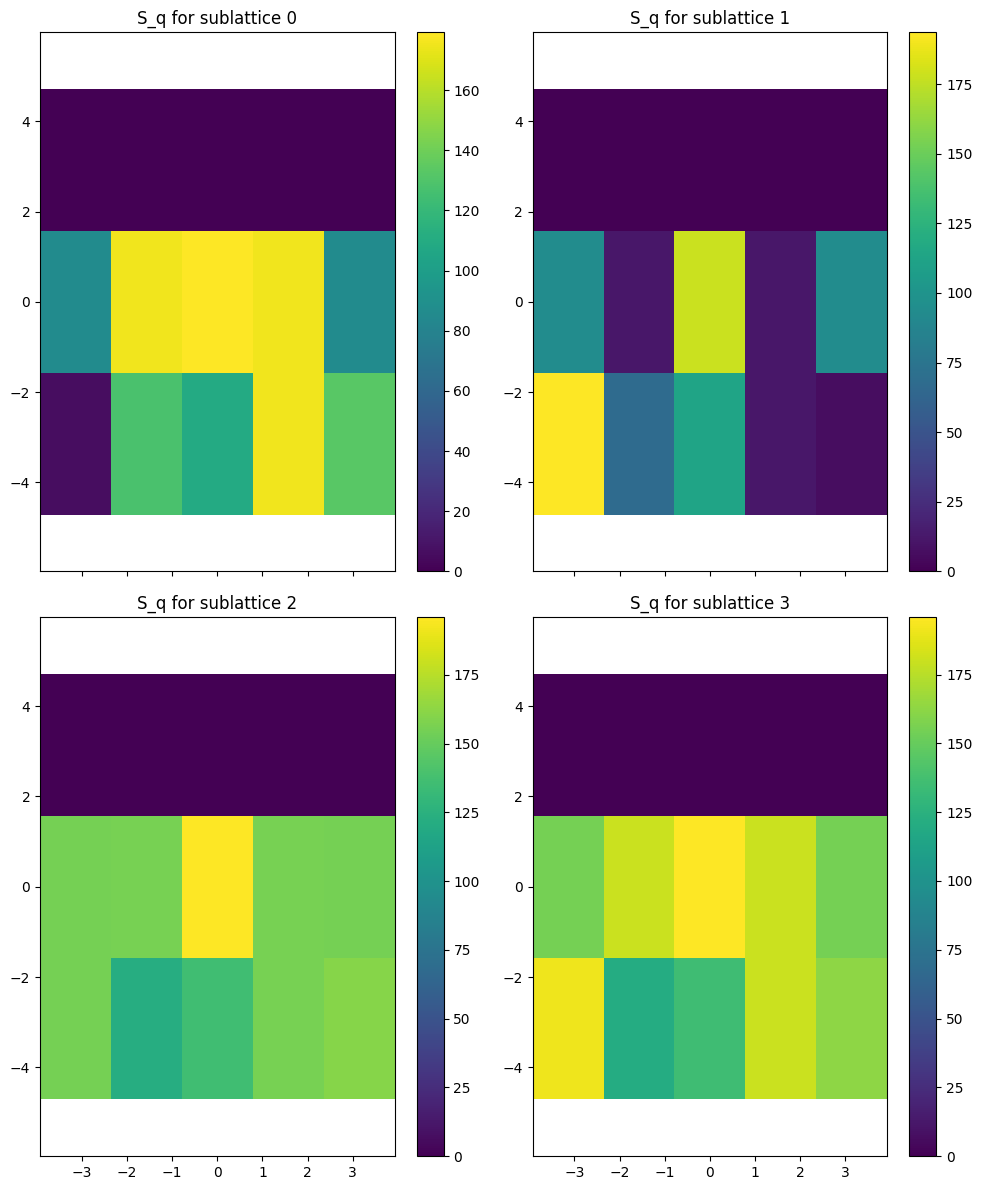

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# filename = "../../tmp/L=40&n_sweeps=128&n_loop=0&n_local=16&T=0.5&seed=0xba8964&.ssf.h5"  # Replace with your actual filename
filename = "../../tmp/L=20&n_sweeps=128&n_loop=0&n_local=16&T=0.5&seed=0xa93&.ssf.h5"  # Replace with your actual filename
filename = "../../tmp/L=4&n_sweeps=128&n_loop=4&n_local=16&T=0.5&seed=0xa93&.ssf.h5"


cmap = plt.get_cmap('plasma')

with h5py.File(filename, 'r') as f:
    
    # # Read lattice size
    L = int(f['lattice_size'][0])
    # print("Lattice size:", lattice_size)

    # # Number of samples
    # n_samples = f['n_samples'][()]
    # print("Number of samples:", n_samples)

    # Basis vectors
    basis_vectors = f['primitive_basis_vectors'][:]
    print("Basis vectors:\n", basis_vectors)

    k_basis_vectors = np.linalg.inv(f['basis_vectors'][:] / L).T

    # # Sublattice offsets
    sublattice_offsets = f['sublattice_offsets'][:]
    # print("Sublattice offsets:\n", sublattice_offsets)

    # Now read and plot S_q for each sublattice
    n_sublattices = sublattice_offsets.shape[0]
    fig, Ax = plt.subplots(2, 2, figsize=(10, 3 * n_sublattices), sharex=True)
    axs = Ax.ravel()
    

    x = np.linspace(-np.pi, np.pi, L+1);
    y = np.linspace(-np.pi, np.pi, L//2+1);

    X, Y = np.meshgrid(x, y, indexing='ij')

    coords = np.vstack([X.ravel(), Y.ravel() ])
    # transformed_coords = 0.5*np.array([[1,1],[-1,1]]) @ coords
    transformed_coords = coords

    X_t = transformed_coords[0].reshape(X.shape)
    Y_t = transformed_coords[1].reshape(Y.shape)
    # print(transformed_coords)
    
    for sl in range(n_sublattices):
        dataset_name = f'S_q_sublattice_{sl}'
        if dataset_name in f:
            S_q = f[dataset_name][:]
            
            im = axs[sl].pcolormesh(X_t, Y_t, np.abs(S_q))
            # axs[sl].pcolormesh((X_t-2*np.pi), Y_t, np.abs(S_q))
            # axs[sl].pcolormesh((X_t-2*np.pi), (Y_t-2*np.pi), np.abs(S_q))
            # axs[sl].pcolormesh((X_t), (Y_t-2*np.pi), np.abs(S_q))
            
            axs[sl].set_title(f'S_q for sublattice {sl}')
            axs[sl].axis('equal')
            fig.colorbar(im, ax=axs[sl])
        else:
            print(f"Warning: Dataset {dataset_name} not found.")

    plt.tight_layout()
    plt.show()
